Check losses

In [7]:
import os

os.environ['THEANO_FLAGS'] = 'device=cpu'

import numpy as np

In [11]:
from keras.losses import categorical_crossentropy, mae, mse, mape
from keras import backend as K

In [12]:
Y_true = K.placeholder(dtype=K.floatx(), shape=(None, 17))
Y_pred = K.placeholder(dtype=K.floatx(), shape=(None, 17))

In [13]:
Loss_1 = categorical_crossentropy(Y_true, Y_pred)
Loss_2 = mae(Y_true, Y_pred)
Loss_3 = mse(Y_true, Y_pred)
Loss_4 = mape(Y_true, Y_pred)

In [14]:
y_true = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], ], dtype=np.float32)
y_pred = 0.5 * np.ones((1, 17), dtype=np.float32)
# y_pred = np.array([[0.5, 0.5, 0.5, 0.5,         0.5 ,        0.5  ,        0.5,  0.52489066,  1.   ,       0.5 ,        0.99995756 , 1.    ,      0.5   ,      0.5,  0.5  ,       0.51348531,  0.5       ], ], dtype=np.float32)

# -- ('8653', 'Train_jpg')
# y_true:  [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
# y_pred:  [ 0.5         0.5         0.5         0.5         0.5         0.99998951
#   0.5         0.5         0.50315326  0.99999619  0.5         0.5
#   0.74787986  0.5         0.5         0.5         0.5       ]

In [15]:
Loss_1.eval(inputs_to_values={Y_true: y_true, Y_pred: y_pred})

array([ 8.49963951], dtype=float32)

In [16]:
Loss_2.eval(inputs_to_values={Y_true: y_true, Y_pred: y_pred})

array([ 0.5], dtype=float32)

In [17]:
Loss_3.eval(inputs_to_values={Y_true: y_true, Y_pred: y_pred})

array([ 0.25], dtype=float32)

In [18]:
Loss_4.eval(inputs_to_values={Y_true: y_true, Y_pred: y_pred})

array([  4.11764704e+08], dtype=float32)

In [6]:
15 * 15 * 17 * 96

367200

In [1]:
import numpy as np
from sklearn.metrics import fbeta_score

In [12]:
y_true = np.array([[0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.1, 0.5, 0.3], [0.0, 0.9, 0.1], [0.1, 0.5, 0.3], [0.0, 0.9, 0.1], [0.1, 0.5, 0.3], [0.0, 0.9, 0.1]])

In [17]:
y_pred[0, :].shape, y_true[0, :].shape

((3,), (3,))

In [37]:
y_true = np.zeros((1000, 17), dtype=np.float64)
y_true[:, 0] = 1.0
y_pred = 0.33 * np.ones((1000, 17), dtype=np.float64)

In [38]:
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

ValueError: Can't handle mix of multilabel-indicator and continuous-multioutput

In [49]:
# 2TP
y_true = np.array([[1, 1],])
y_pred = np.array([[1, 1],])
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

1.0

In [52]:
# 2TP
y_true = np.array([[1, 1],])
y_pred = np.array([[1, 1],])
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

1.0

In [53]:
# 1FN + 1TP
y_true = np.array([[1, 1],])
y_pred = np.array([[0, 1],])
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

0.55555555555555558

In [54]:
# 1FP + 1TP
y_true = np.array([[0, 1],])
y_pred = np.array([[1, 1],])
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

0.83333333333333337

In [50]:
# 2FP
y_true = np.array([[0, 0],])
y_pred = np.array([[1, 1],])
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true labels.
  'recall', 'true', average, warn_for)


0.0

In [51]:
# 2FP
y_true = np.array([[1, 1],])
y_pred = np.array([[0, 0],])
fbeta_score(y_true, y_pred, beta=2.0, average='samples')

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted labels.
  'precision', 'predicted', average, warn_for)


0.0

In [70]:
y_true = (np.random.rand(17) > 0.8).astype(np.uint8)
y_pred1 = np.random.randint(2, size=(17,))
y_pred2 = np.ones((17,), dtype=np.uint8)

In [71]:
print(y_true)
print(y_pred1)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
[1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [72]:
fbeta_score(y_true, y_pred1, beta=2.0), fbeta_score(y_true, y_pred2, beta=2.0)

(0.23809523809523811, 0.51724137931034486)

In [9]:
y_true = np.array([[1.0, 1.0, 0.0, 1.0], [1.0, 1.0, 0.0, 1.0], [1.0, 1.0, 0.0, 1.0]], dtype=np.float32)
y_pred = np.array([[0.3, 0.99, 0.99, 0.1], [0.6, 0.99, 0.99, 0.1], [0.1, 0.99, 0.99, 0.1]], dtype=np.float32)

In [10]:
n_fn = 0.25 * 0.333 * np.sum((y_true - y_pred) > 0.5)

In [11]:
n_fn

0.41625000000000001

In [5]:
from keras import backend as K

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5110)


In [12]:
def false_negatives(Y_true, Y_pred):
    return K.mean(K.round(K.clip(Y_true - Y_pred, 0, 1)))

In [13]:
Y_true = K.placeholder((None, 4), dtype=K.floatx())
Y_pred = K.placeholder((None, 4), dtype=K.floatx())
n_fn = false_negatives(Y_true, Y_pred).eval(inputs_to_values={Y_true: y_true, Y_pred: y_pred})

In [14]:
n_fn

array(0.4166666865348816, dtype=float32)

In [110]:
1.0 / 17.0

0.058823529411764705

In [1]:
import os
import sys

sys.path.append("../common")

In [2]:
from training_utils import exp_decay, step_decay

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5110)


In [3]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline

In [15]:
x = np.arange(0, 50)
lr_1 = exp_decay(x, lr=0.01, a=0.95)
lr_2 = step_decay(x, lr=0.01, base=2, period=10)
lr_3 = exp_decay(x, lr=0.01, a=0.93)

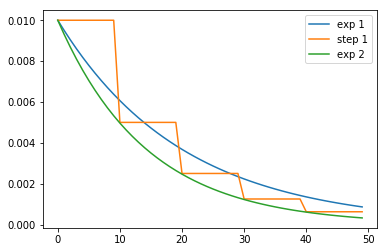

In [16]:
plt.figure()
plt.plot(x, lr_1, label='exp 1')
plt.plot(x, lr_2, label='step 1')
plt.plot(x, lr_3, label='exp 2')
plt.legend()

In [4]:
exp_decay(25, lr=0.01, a=0.95)

0.0028650479686018978

In [2]:
64 * 64 * 3 * 40000 / 1024.0 / 1024.0

468.75